# House Price Prediction using XGBoost

In [114]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# XGBRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score


# Table of content
1. [Introduction](#intro)
2. [Data Inspection and EDA](#eda)
	* [Data Distribution Plot](#dist)
	* [Pair Plot ](#pair)
	* [Correlation Plot](#corr)
	* [Data Imputation](#impute)
3. [LASSO - Feature Selection](#lasso)
4. [XGBoost](#xgb)
5. [Test Prediction](#test)
6. [Conclusion](#conclusion)

# Introduction<a name='intro'></a>

This project is created a final project for `DTSA 5509 Supervised Learning` Course offered by `University of Colorado Boulder`.

Part of the course we experimented with AdaBoost and studied XGBoost.  I wanted to try the XGBoost part this project.  For this purpose I am taking the House Price prediction challenge in Kaggle.

Change information can be found here.  [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

## Github URL
https://github.com/vinothmdev/Supervised-Machine-Learning.git

# Data Inspection and EDA<a name='eda'></a>

In [115]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

Exploring the traing data

In [116]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [117]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [119]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Distribution Plot<a name='dist'></a>

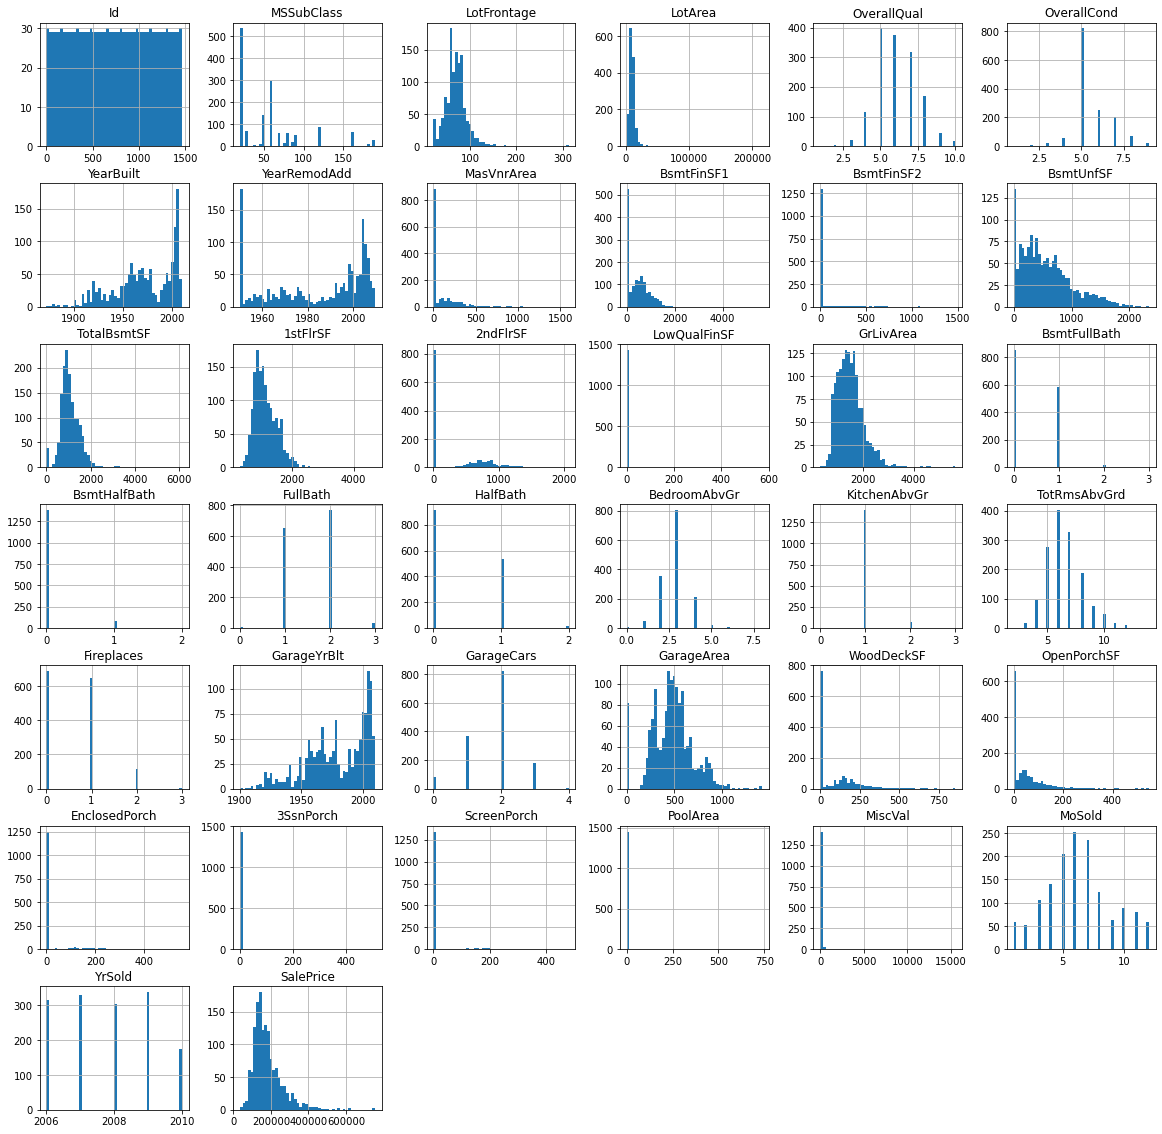

In [120]:
train_data.hist(bins=50, figsize=(20,20))
plt.show()

In [121]:
training_corr = train_data.corr()
training_corr = training_corr.corr()['SalePrice'].abs().sort_values(ascending=False)
high_corr_cols = training_corr[training_corr > 0.6].index.to_list()[1:]
high_corr_cols

['OverallQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'MasVnrArea',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'Fireplaces',
 'TotRmsAbvGrd',
 'OpenPorchSF']

In [122]:
high_corr_df = train_data[train_data.columns.intersection(high_corr_cols)]
high_corr_df = high_corr_df[:]
high_corr_df['SalePrice'] = train_data['SalePrice'].copy()

## Pair Plot <a name='pair'><a>

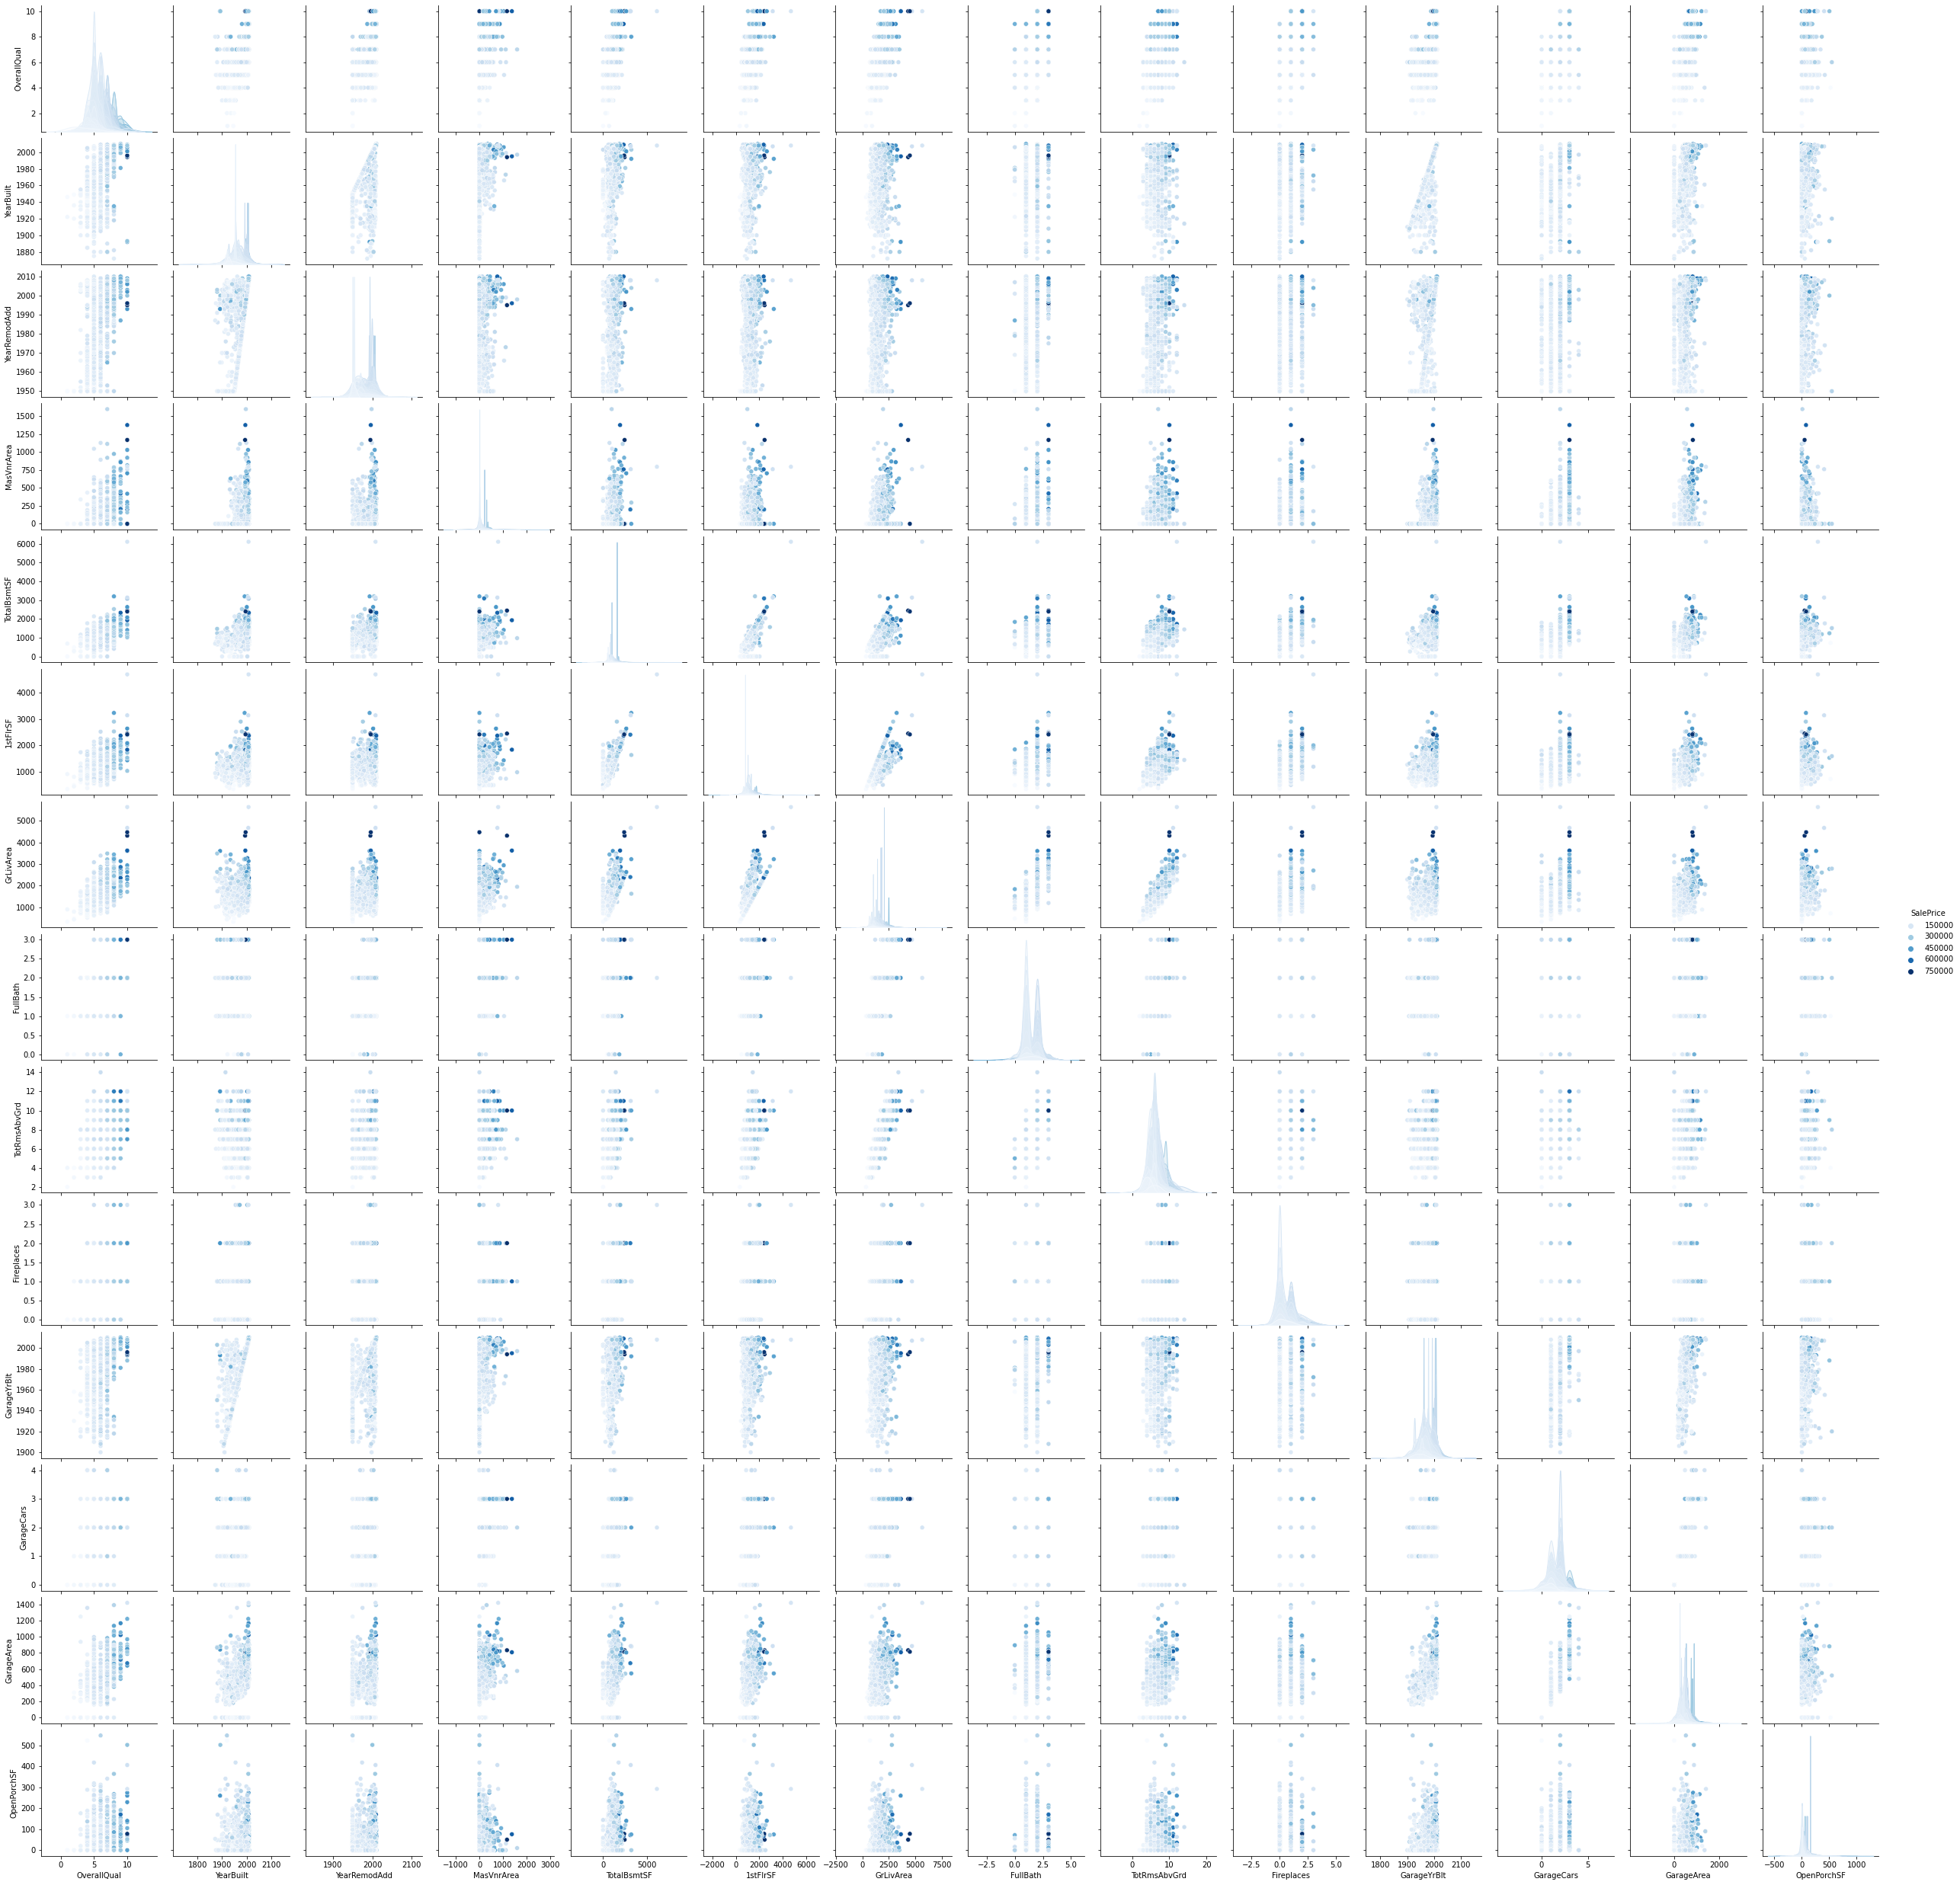

In [123]:
sns.pairplot(high_corr_df,hue='SalePrice', palette='Blues')
plt.show()

## Correlation Plot<a name='corr'></a>

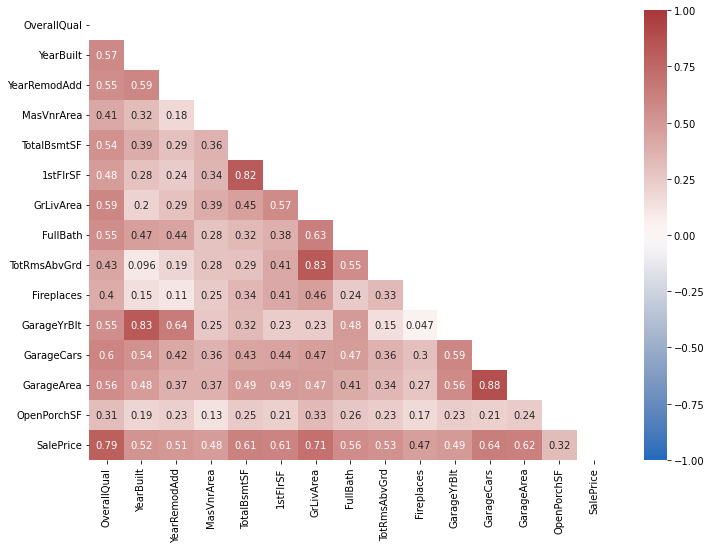

In [124]:
fig_dims = (11.7, 8.27)
high_corr_ = high_corr_df.corr() 
fig, ax = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(high_corr_,dtype=bool))
sns.heatmap(high_corr_,annot=True,vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()

In [125]:
train_data.isnull().sum().sort_values(ascending=False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [126]:
test_data.isnull().sum().sort_values(ascending=False).head()

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
dtype: int64

## Data Imputation<a name='impute'></a>

In [127]:
numeric_cols = list(train_data.drop('SalePrice',axis=1).select_dtypes(include='number'))
category_cols = list(train_data.select_dtypes(exclude='number'))

In [128]:
len(numeric_cols), len(category_cols)

(37, 43)

In [129]:
train_data[category_cols] = train_data[category_cols].replace(np.nan,'None')

In [130]:
def impute_mean(df, key):
    df[key] = df[key].fillna(df[key].mean())

In [131]:
[impute_mean(train_data, key) for key in numeric_cols]
train_data.isnull().sum().sort_values(ascending=False).head()

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

In [132]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [133]:
numeric_cols = list(test_data.select_dtypes(include='number'))
category_cols = list(test_data.select_dtypes(exclude='number'))

In [134]:
len(numeric_cols), len(category_cols)

(37, 43)

In [135]:
test_data[category_cols] = test_data[category_cols].replace(np.nan,'None')

In [136]:
[impute_mean(test_data, key) for key in numeric_cols]
test_data.isnull().sum().sort_values(ascending=False).head()

Id             0
MSSubClass     0
GarageType     0
FireplaceQu    0
Fireplaces     0
dtype: int64

In [137]:
numeric_cols.remove('Id')
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [138]:
features = train_data.drop('Id',axis=1).columns

In [139]:
encoder = LabelEncoder()
for col in features:
    if train_data[col].dtype == 'object':
        train_data[col] = encoder.fit_transform(train_data[col])
        test_data[col] = encoder.fit_transform(test_data[col])
        
    elif train_data[col].dtype == 'bool':
        train_data[col] = train_data[col].astype('int')
        test_data[col] = test_data[col].astype('int')

scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.fit_transform(test_data[numeric_cols])

In [140]:
train_data['SalePrice'] = train_data['SalePrice'].astype('int')
X=train_data.drop(["SalePrice"],axis=1)
y=train_data["SalePrice"]

# LASSO - Feature Selection<a name='lasso'></a>

In [141]:
n = X.shape[0]
for i in range(X.shape[0]):
    Xi = X.drop(X.index[i])
    yi = y.drop(y.index[i])

    lasso = Lasso(alpha=0.01,selection='random').fit(Xi, yi)
    feats_selected = np.where(lasso.coef_>0)[0]

In [142]:
feats_selected, len(feats_selected)

(array([ 4,  5,  6,  8, 10, 11, 12, 17, 18, 19, 21, 22, 24, 25, 26, 28, 29,
        31, 35, 38, 41, 43, 44, 46, 47, 49, 50, 54, 55, 56, 58, 61, 64, 65,
        66, 69, 70, 73, 75, 79], dtype=int64),
 40)

In [143]:
print(X.shape)
X = X.iloc[:,feats_selected]
print(X.shape)

(1460, 80)
(1460, 40)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# XGBoost<a name='xgb'></a>

In [145]:
params = { 'max_depth': [6,10,50],
           'learning_rate': [0.01, 0.02, 0.05],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.7, 1.0] }

xgb_ = XGBRegressor(seed=20)

xgb_grid = GridSearchCV(estimator=xgb_, param_grid=params, cv=2)

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat..._step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                       

# Test Prediction<a name='test'></a>

In [146]:
pred = xgb_grid.predict(X_test)
R2 = r2_score(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = math.sqrt(MSE)

print('R square : ',R2)
print('MSE : ',MSE)
print('RMSE : ',RMSE)

R square :  0.928238856151609
MSE :  481748922.94540447
RMSE :  21948.7795320242


# Conclusion<a name="conclusion"></a>

In this project I experimented with XGBoost using House Price Prediction data.  It gives good $R^2$ value.  This model explains around 93% of the variance in the data.  This is good result, we can do further fine tuning but the scope it to try the supervised learning so I followed Lesso instead of PCA.